Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [8]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [9]:
def calculate_w(intercept, coef):
    w_rj = []
    w_rj.append(intercept)
    for one in coef:
        w_rj.append(one)
    return w_rj

[2.1, -0.5000000000000002, -0.09999999999999981]
Tocnost je: 1.0


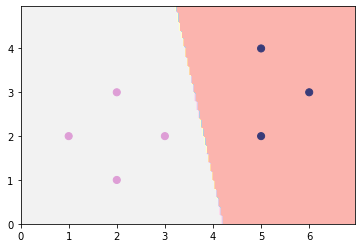

In [10]:
# Vaš kôd ovdje
r_model = RidgeClassifier(0).fit(seven_X, seven_y)
y_predicted_r = r_model.predict(seven_X)
print(calculate_w(r_model.intercept_[0], r_model.coef_[0]))

plot_2d_clf_problem(seven_X, seven_y, lambda x: r_model.predict(x) >= 0.5)
tocnost_r = accuracy_score(seven_y, y_predicted_r)
print("Tocnost je: " + str(tocnost_r))
plt.show()

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

[1.5500000000000003, -0.25000000000000006, -0.050000000000000086]
Tocnost je: 1.0


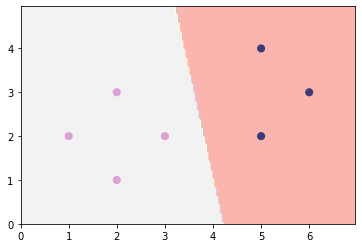

In [11]:
# Vaš kôd ovdje
l_model = LinearRegression().fit(seven_X, seven_y)
y_predicted_l = l_model.predict(seven_X)
for i in range(len(y_predicted_l)):
    one = y_predicted_l[i]
    if one >= 0.5:
        y_predicted_l [i] = 1
    else:
        y_predicted_l[i] = 0   
print(calculate_w(l_model.intercept_, l_model.coef_))

plot_2d_clf_problem(seven_X, seven_y, lambda x: l_model.predict(x) >= 0.5)
tocnost_l = accuracy_score(seven_y, y_predicted_l)
print("Tocnost je: " + str(tocnost_l))
plt.show()

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

[0.84938704028021, -0.402802101576182, 0.3082311733800349]
Tocnost je: 0.875


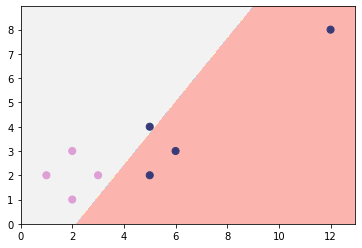

In [9]:
# Vaš kôd ovdje
r_model_b = RidgeClassifier(0).fit(outlier_X, outlier_y)
y_predicted_r_b = r_model_b.predict(outlier_X)
print(calculate_w(r_model_b.intercept_[0], r_model_b.coef_[0]))

plot_2d_clf_problem(outlier_X, outlier_y, lambda x: r_model_b.predict(x) >= 0.5)
tocnost_r_b = accuracy_score(outlier_y, y_predicted_r_b)
print("Tocnost je: " + str(tocnost_r_b))
plt.show()

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

[1.5050505050505047, -0.4040404040404039, -0.0808080808080809]
Tocnost je: 0.875


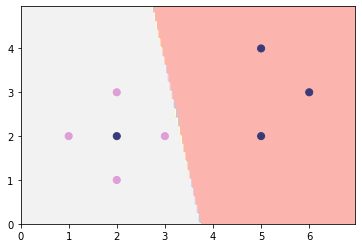

In [11]:
# Vaš kôd ovdje
r_model_c = RidgeClassifier(0).fit(unsep_X, unsep_y)
y_predicted_r_c = r_model_c.predict(unsep_X)
print(calculate_w(r_model_c.intercept_[0], r_model_c.coef_[0]))

plot_2d_clf_problem(unsep_X, unsep_y, lambda x: r_model_c.predict(x) >= 0.5)
tocnost_r_c = accuracy_score(unsep_y, y_predicted_r_c)
print("Tocnost je: " + str(tocnost_r_c))
plt.show()

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

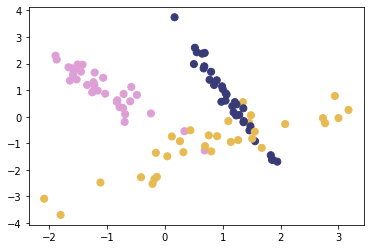

In [12]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X_random, y_random = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X_random, y_random)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

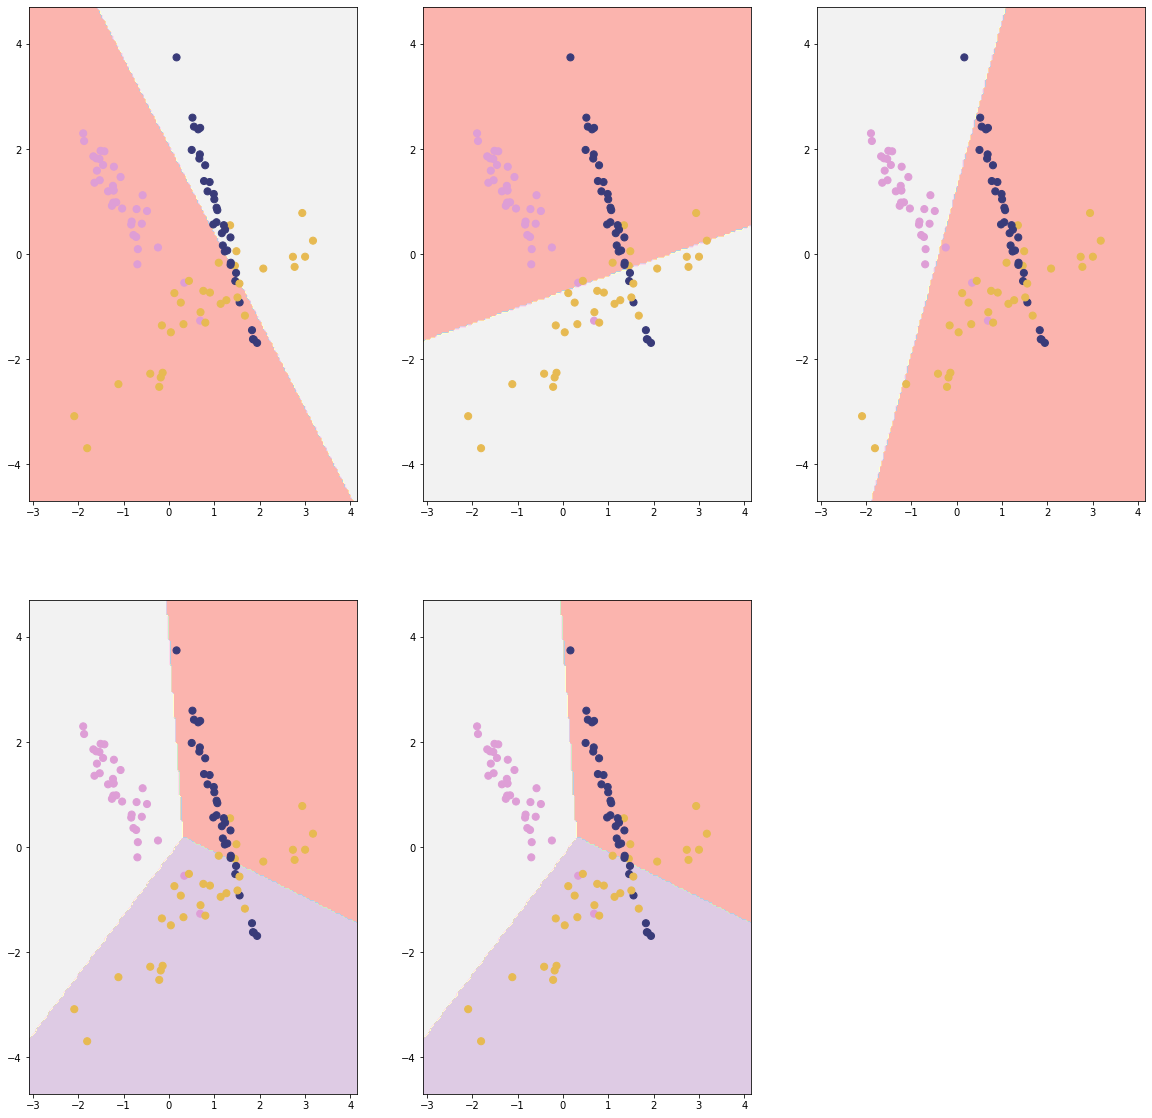

In [13]:
# Vaš kôd ovdje
def predict(x, h):
    rj = []
    max = h[0](x.reshape(1, -1))
    j = 0
    for i in range(1, len(h)):
        value = h[i](x.reshape(1, -1))
        if value > max:
            j = i
            max = value
    return j

h1_y = [] #odvaja klasu 1
h2_y = [] #odvaja klasu 2
h3_y = [] #odvaja klasu 3
for i in y_random:
    if i == 0:
        h1_y.append(1)
        h2_y.append(0)
        h3_y.append(0)
    elif i == 1:
        h1_y.append(0)
        h2_y.append(1)
        h3_y.append(0)
    else:
        h1_y.append(0)
        h2_y.append(0)
        h3_y.append(1)

l_model_1 = LinearRegression().fit(X_random, h1_y)
l_model_2 = LinearRegression().fit(X_random, h2_y)
l_model_3 = LinearRegression().fit(X_random, h3_y)
h1_p = lambda x: l_model_1.predict(x)
h2_p = lambda x: l_model_2.predict(x)
h3_p = lambda x: l_model_3.predict(x)
h = [h1_p, h2_p, h3_p]

plt.figure(figsize = (20, 20))
subplot(2, 3, 1)
plot_2d_clf_problem(X_random, y_random, lambda x: h1_p(x) >= 0.5)

subplot(2, 3, 2)
plot_2d_clf_problem(X_random, y_random, lambda x: h2_p(x) >= 0.5)

subplot(2, 3, 3)
plot_2d_clf_problem(X_random, y_random, lambda x: h3_p(x) >= 0.5)

subplot(2, 3, 4)
plot_2d_clf_problem(X_random, y_random, lambda x: predict(x, h))

subplot(2, 3, 5)
r_model_2 = RidgeClassifier(0).fit(X_random, y_random)
plot_2d_clf_problem(X_random, y_random, lambda x: r_model_2.predict(x))
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

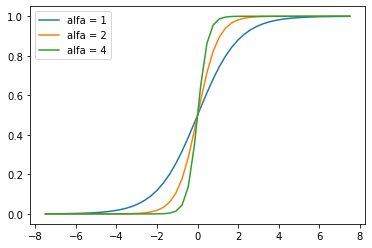

In [14]:
# Vaš kôd ovdje
def sigm(x, alfa=1):
    nazivnik = 1 + exp(-alfa * x)
    return 1/nazivnik
alfa = [1, 2, 4]
x = linspace(-7.5, 7.5)
for one in alfa:
    plot(x, sigm(x, one), label = "alfa = " + str(one))
    legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [15]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
import math

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    # Vaš kôd ovdje
    N = len(X)
    w_size = shape(X)[1]
    w0 = 0
    w = np.zeros(w_size) # all w except w0
    w_all = []
    
    previous_error = float('inf')
    w_pom = calculate_w(w0, w)
    
    for i in range(max_iter):
        delta_w0 = 0
        delta_w = np.zeros(w_size)
        for j in range(N):
            h_3 = lr_h(X[j], w_pom)
            delta_w0 = delta_w0 + h_3 - y[j]
            delta_w = delta_w + (h_3 - y[j]) * X[j]
            
        w0 = w0 - eta * delta_w0
        w = w * (1 - eta * alpha) - np.dot(eta, delta_w)
        w_pom.clear()
        w_pom = calculate_w(w0, w)
            
        if trace:
            w_all.extend(w_pom)
        
        current_error = cross_entropy_error(X, y, w_pom)
        if abs(current_error - previous_error) < epsilon:
            break
        previous_error = current_error
        
    if trace:
        return w_pom, w_all
    else:
        return w_pom
    
def lr_h(x, w):
    fi = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
    v = np.dot(w, fi[0])
    return sigm(v)
    
def cross_entropy_error(X, y, w):
    E = 0
    N = len(X)
    for i in range(N):
        value = lr_h(X[i], w)
        E = E - y[i] * math.log(value) - (1 - y[i]) * math.log(1 - value)
    return E/N

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[4.4544945420360165, -1.7108924201238558, 0.6841350736281353]
Pogreska unakrsne entropije: 0.13521872720206746


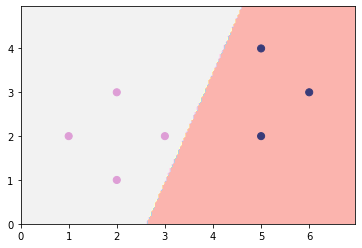

In [16]:
# Vaš kôd ovdje
w_3 = lr_train(seven_X, seven_y)
print(w_3)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w_3) >= 0.5)
error = cross_entropy_error(seven_X, seven_y, w_3)
print("Pogreska unakrsne entropije: " + str(error))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [17]:
from sklearn.metrics import zero_one_loss

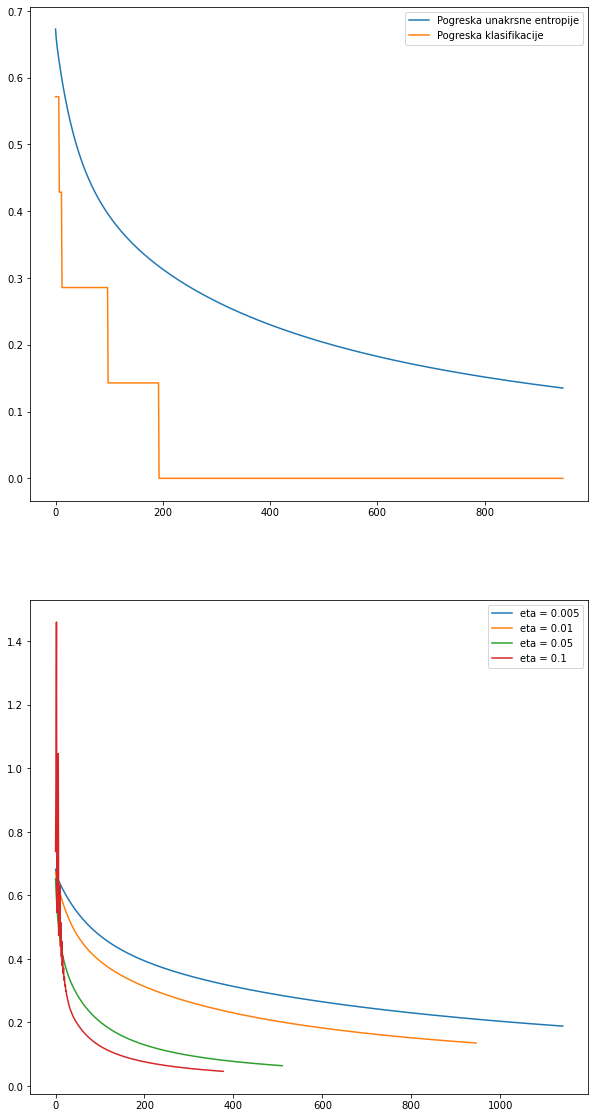

In [18]:
# Vaš kôd ovdje
def h_01(x):
    izlaz = []
    for one in x:
        if one >= 0.5:
            izlaz.append(1)
        else:
            izlaz.append(0)
    return izlaz
    
def rez(fi, w):
    v = np.dot(w, np.transpose(fi))
    v1 = sigm(v)
    return h_01(v1)

eta = [0.005, 0.01, 0.05, 0.1]
fi = PolynomialFeatures(1).fit_transform(seven_X)
w_3d, sve = lr_train(seven_X, seven_y, trace=True)
error_log = []
error_01 = []

fig, axs = plt.subplots(2, 1, figsize = (10, 20))
for i in range(0, len(sve), 3):
    w = sve[i:i+3]
    error_log.append(cross_entropy_error(seven_X, seven_y, w))
    error_01.append(zero_one_loss(seven_y, rez(fi, w)))
    
axs[0].plot(error_log, label = "Pogreska unakrsne entropije")
axs[0].plot(error_01, label = "Pogreska klasifikacije")
axs[0].legend()

error_eta = []
for one in eta:
    w_3d, sve = lr_train(seven_X, seven_y, eta=one, trace=True)
    for i in range(0, len(sve), 3):
        w = sve[i:i+3]
        error_eta.append(cross_entropy_error(seven_X, seven_y, w))
    axs[1].plot(error_eta, label = "eta = " + str(one))
    error_eta.clear()
axs[1].legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

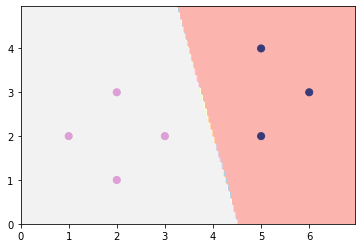

In [19]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
model_3 = LogisticRegression(max_iter=2000, tol=0.0001).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: model_3.predict(x))

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

'w_4 = lr_train(outlier_X, outlier_y)\nprint(w_4)\nplot_2d_clf_problem(outlier_X, outlier_y, lambda x: lr_h(x, w_4) >= 0.5)'

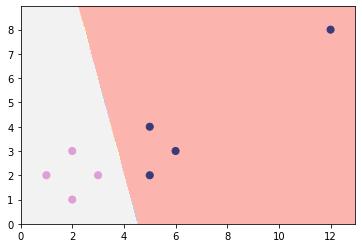

In [20]:
# Vaš kôd ovdje
model_4 = LogisticRegression(max_iter=2000, tol=0.0001).fit(outlier_X, outlier_y)
h_4 = lambda x: model_4.predict(x)
plot_2d_clf_problem(outlier_X, outlier_y, h_4)
'''w_4 = lr_train(outlier_X, outlier_y)
print(w_4)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: lr_h(x, w_4) >= 0.5)'''

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

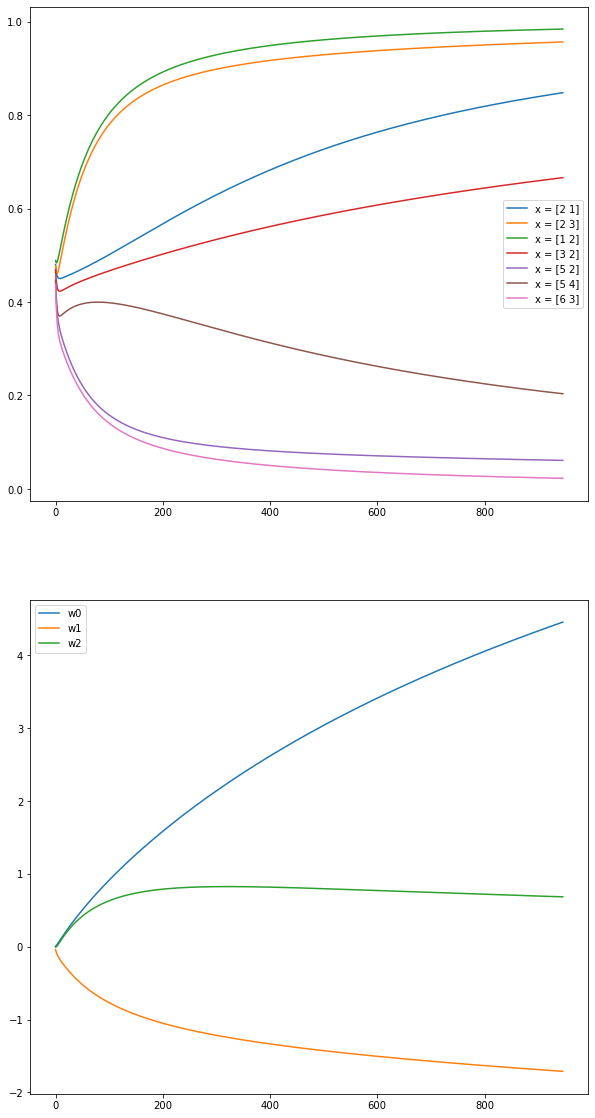

In [21]:
# Vaš kôd ovdje
w_4, sve = lr_train(seven_X, seven_y, trace=True)
velicina = int(len(sve)/3)
w_all = [[0 for i in range(velicina)] for j in range(3)]
h = [[0 for i in range(velicina)] for j in range(shape(seven_X)[0])]
k = 0
for i in range(0, len(sve), 3):
    w = sve[i:i+3]
    w_all[0][k] = w[0]
    w_all[1][k] = w[1]
    w_all[2][k] = w[2]
    for j in range(len(seven_y)):
        h[j][k] = lr_h(seven_X[j], w)
    k = k + 1
fig, axs = plt.subplots(2, 1, figsize = (10, 20))
for i in range(len(seven_y)):
    axs[0].plot(h[i], label="x = "+str(seven_X[i]))
axs[0].legend()
for i in range(3):
    axs[1].plot(w_all[i], label="w"+str(i))
axs[1].legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

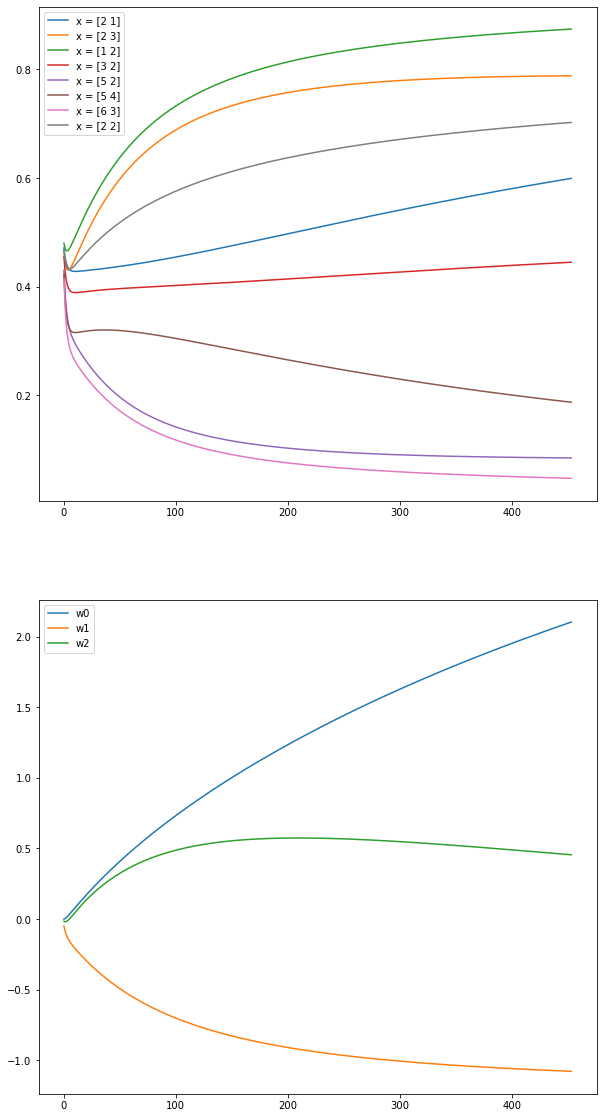

In [22]:
# Vaš kôd ovdje
w_4, sve = lr_train(unsep_X, unsep_y, trace=True)
velicina = int(len(sve)/3)
w_all = [[0 for i in range(velicina)] for j in range(3)]
h = [[0 for i in range(velicina)] for j in range(shape(unsep_X)[0])]
k = 0
for i in range(0, len(sve), 3):
    w = sve[i:i+3]
    w_all[0][k] = w[0]
    w_all[1][k] = w[1]
    w_all[2][k] = w[2]
    for j in range(len(unsep_y)):
        h[j][k] = lr_h(unsep_X[j], w)
    k = k + 1
fig, axs = plt.subplots(2, 1, figsize = (10, 20))
for i in range(len(unsep_y)):
    axs[0].plot(h[i], label="x = "+str(unsep_X[i]))
axs[0].legend()
for i in range(3):
    axs[1].plot(w_all[i], label="w"+str(i))
axs[1].legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [23]:
from numpy.linalg import norm

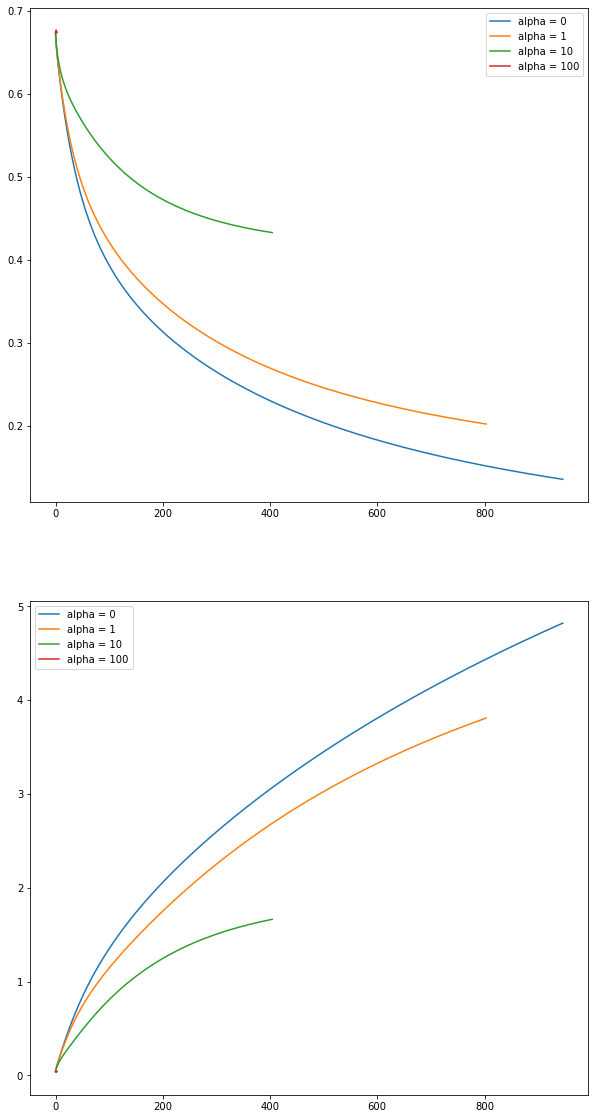

In [24]:
# Vaš kôd ovdje
def L2(w):
    return math.sqrt(np.dot(np.transpose(w), w))
alfa = [0, 1, 10, 100]
error = []
L2_n = []
fig, axs = plt.subplots(2, 1, figsize = (10, 20))
for one in alfa:
    w_5, sve = lr_train(seven_X,seven_y, alpha=one, trace=True)
    for i in range(0, len(sve), 3):
        w = sve[i:i+3]
        error.append(cross_entropy_error(seven_X, seven_y, w))
        L2_n.append(L2(w))
    axs[0].plot(error, label = "alpha = " + str(one))
    axs[1].plot(L2_n, label = "alpha = " + str(one))
    error.clear()
    L2_n.clear()
axs[0].legend()
axs[1].legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [25]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

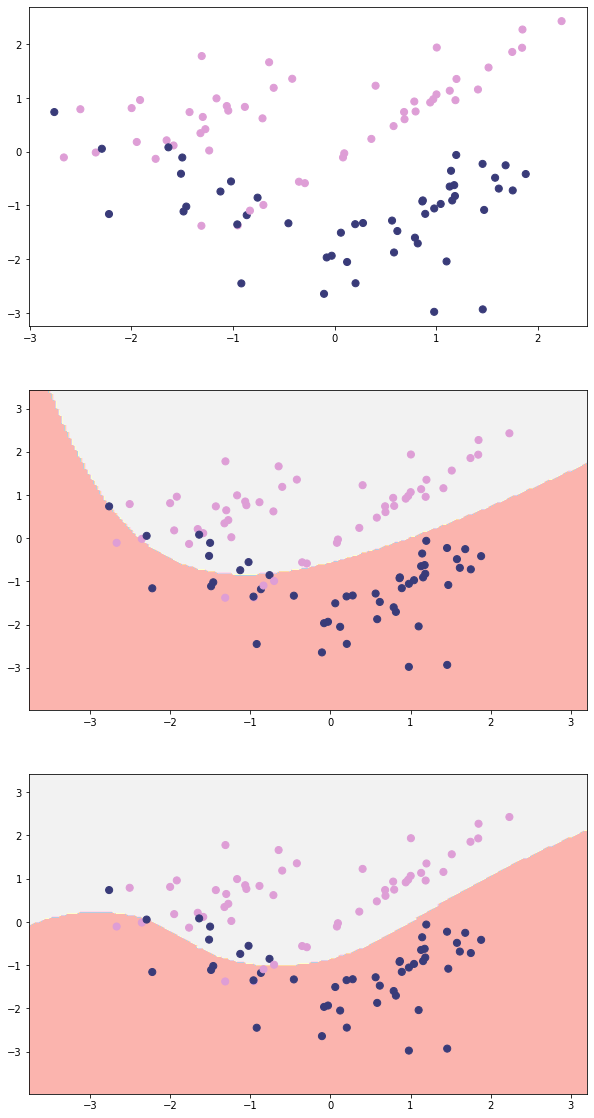

In [27]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
figure(figsize(10, 20))
subplot(3, 1, 1)
d = [2, 3]
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plot_2d_clf_problem(X, y)

subplot(3, 1, 2)
poly = PolynomialFeatures(d[0]) 
fi = poly.fit_transform(X)
model = LogisticRegression().fit(fi, y)
plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

subplot(3, 1, 3)
poly = PolynomialFeatures(d[1])
fi = poly.fit_transform(X)
model = LogisticRegression().fit(fi, y)
plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))


**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?